# Decision Tree

In [6]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import mglearn


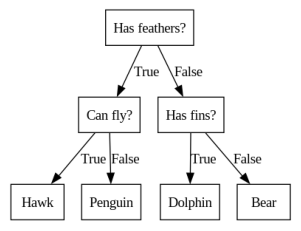

In [8]:
mglearn.plots.plot_animal_tree()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [14]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy on training set: 1.000
accuracy on test set: 0.937


In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951
